###Exploratory data analysis 1 -- distribution of version counts in putlocker.is data.

I'm using version count as a piracy index. It is the number of versions of a movie that are available for streaming on putlocker.is. The more versions of a movie are online, the more that movie is being pirated through streaming sites. This has the practical consequence of that movie being easier to watch for free online, because more versions mean that the movie is more widely distributed across the web, and different versions provide alternatives to pick from when a given version is slow to load or otherwise fails.

In [8]:
import pandas as pd, seaborn as sns, numpy as np
from matplotlib import pyplot as plt
sns.set(style = 'white')
%matplotlib inline

data = pd.read_csv('/Users/ilya/metis/week2/project2/clean_data.csv')
del data['Unnamed: 0']

####Plot distribution of version counts
Version_count was collected from each movie's putlocker.is page. The URL for that page was a guess based on the naming conventions that putlocker appears to use. When a movie was not found at any of the locations where my code guessed it should be, its version_count was set to 0. But this isn't safe-- it might be that putlocker doesn't use its naming conventions for every movie. So I remove any rows of data that have version_count = 0, since I don't know for sure if these are movies that are not available for streaming, or just movies that have non-standard putlocker URLs. 

In [26]:
data2 = data[data.version_count != 0]

Removing version_count = 0 cuts the file from 3979 rows to 3096 rows.

3096


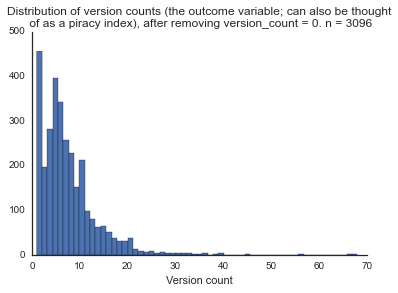

In [31]:
#Now plot the distribution of the outcome variable:
data2.version_count.hist(bins = 60, grid = False)
sns.despine(left = False, right = True, bottom = False)
print len(data2.version_count)
plt.title('Distribution of version counts (the outcome variable; can also be\
 thought\n of as a piracy index), after removing version_count = 0. n = 3096')
plt.xlabel('Version count')
plt.show()

The distribution appears bimodal. Also plot a cumulative distribution:

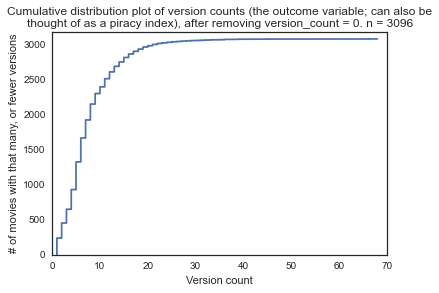

In [20]:
sorted_data = np.sort(data2.version_count)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.title('Cumulative distribution plot of version counts (the outcome\
 variable; can also be \nthought of as a piracy index), after removing\
 version_count = 0. n = 3096')
plt.xlabel('Version count')
plt.ylabel('# of movies with that many, or fewer versions')
plt.ylim([0,3200])
plt.show()

####Why is there more than one mode?
There is a major mode around version_count = 5, and a minor mode around 1. I think that it's likely that there are many movies with version_count = 1 because file hosting sites benefit from putting up something rather than nothing for a given movie, to pull traffic to their site. These lone versions often don't even work, supporting my theory that they are more of a traffic-pulling gimmick than an honest attempt at hosting a file.

For this reason, I temporarily remove movies that have version_count = 1. This drops the number of rows to 2856.

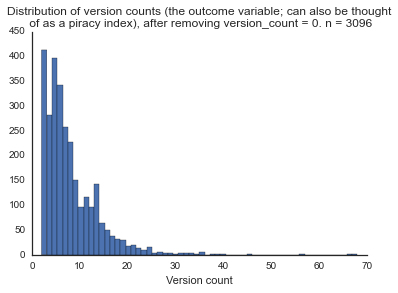

In [34]:
data3 = data2[data2.version_count != 1]
#Now plot the distribution of the outcome variable again:
data3.version_count.hist(bins = 60, grid = False)
sns.despine(left = False, right = True, bottom = False)
plt.title('Distribution of version counts (the outcome variable; can also be\
 thought\n of as a piracy index), after removing version_count = 0. n = 3096')
plt.xlabel('Version count')
plt.show()

There is still a spike at the far left of the distribution, but at least there isn't an obvious reason why this might be the case. I'm less worried now, and will assume that spike (and the other, minor one at version_count = 14) is noise.

In [47]:
print "The mean is: %f" % (np.mean(data3.version_count))
print "The median is: %f" % (np.median(data3.version_count))
print "The variance is: %f" % (np.var(data3.version_count))

The mean is: 8.098039
The median is: 6.000000
The variance is: 32.316719


The variance is much higher than the mean here. The data are count data. The distribution is clearly non-normal.